# AIFFEL 1st Project : 가위바위보

## 1-1. 데이터 Resize  
- 원 데이터의 사이즈를 줄여주는 과정 (224x224 > 28x28)  
- rock_scissor_paper 폴더 안의 모든 파일을 읽어 사이즈를 바꾸어 다시 저장한다.  
    - for 문으로 바꿀 수 없나?

In [6]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
# !pip install pillow   

from PIL import Image
import os, glob

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/train/rock_scissor_paper*/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/train/rock_scissor_paper*/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg") 

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/train/rock_scissor_paper*/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg") 

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("모든 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/train/rock_scissor_paper*/scissor
이미지 디렉토리 경로:  /home/aiffel/aiffel/train/rock_scissor_paper*/rock
이미지 디렉토리 경로:  /home/aiffel/aiffel/train/rock_scissor_paper*/paper
모든 이미지 resize 완료!


## 1-2. 가위바위보 이미지 불러오기 _ train set  
- 처음 저장해두었던 train 데이터는 300개 (현재는 2100개) 의 데이터 불러오기

In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/train/rock_scissor_paper_0"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


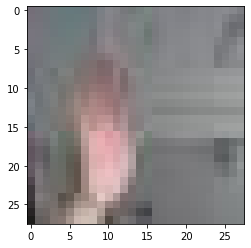

In [13]:
# 데이터 확인하기 : 300장이므로 0~299 인덱스만 사용가능
plt.imshow(x_train[299],cmap=plt.cm.binary)
plt.show()

## 1-3. 모델 만들고 학습시키기

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# 하이퍼파라미터 설정
n_channel_1=16
n_channel_2=20
n_dense=30
n_train_epoch=35

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) # 컬러 이미지 ; shape 28x28x3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 데이터 라벨 3개 ; output 3개!

In [141]:
# model을 학습시키는 코드
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/30
10/10 [==============================] - 0s 2ms/step - loss: 27.0520 - accuracy: 0.3333
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 5.2681 - accuracy: 0.4467
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 2.3020 - accuracy: 0.5200
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 1.4205 - accuracy: 0.6667
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7722 - accuracy: 0.7533
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8533
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8867
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9233
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9567
Epoch 10/30
10/10 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9633
Epoch 11/30
10/10 

### <U>과적합(overfitting)</U>이 발생한 것으로 보인다.

## 1-4. 테스트 이미지 불러오기

In [24]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# 파일 불러오기
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는",idx,"입니다.")
    return imgs, labels
image_dir_path = os.getenv("HOME") + "/aiffel/test/rock_scissor_paper"
(x_test_s, y_test_s)=load_data(image_dir_path)
x_test_norm = x_test_s/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_s.shape))
print("y_test shape: {}".format(y_test_s.shape))

데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


## 1-5. 모델 평가하기

In [142]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 17.4621 - accuracy: 0.4000
test_loss: 17.46211814880371 
test_accuracy: 0.4000000059604645


하이퍼파라미터(n_channel_1, n_channel_2, n_dense, n_train_epoch)를 조절해도 테스트 정확도가 30% 안팎으로 도출되어 ***학습데이터에 문제가 있다*** 판단.
> 학습데이터 수가 적다.  
> 학습데이터의 퀄리티가 좋지 않다.

AIFFEL 학생분들의 데이터를 모아 다시 학습시켜보려 한다. 다운받은 데이터를 train 폴더에 넣은 후 다시 모델 학습하였다.

## 2-2. 다시 데이터 모으기
- 다운로드한 데이터를 train set 폴더에 넣었다. 코드 수정을 적게 하려고 rock_scissor_paper 공통된 이름의 폴더의 데이터만 추가했다.  
    - 이름 상관없이 데이터 추가하는 법이 있는지 찾아보기  
- 데이터 개수가 달라 load_data_train으로 함수 이름을 수정하였다.  
    - 데이터 개수 상관없이 불러 올 수 있는 방법은 없나?
    
<img src="Pictures/trainingset.png" width="700px" height="400px"></img><br/>

In [12]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

def load_data_train(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300   # 가위바위보 이미지 개수 총합에 주의하세요. 모은 데이터 개수
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/train/rock_scissor_paper*"
(x_train, y_train)=load_data_train(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train shape: (3300, 28, 28, 3)
y_train shape: (3300,)


## 2-3. 새로운 학습 데이터로 모델 학습 및 평가하기

In [45]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요. 16, 32, 30, 20
n_channel_1=16
n_channel_2=48
n_dense=50
n_train_epoch=25

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) # 컬러 이미지 ; shape 28x28x3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 데이터 라벨 3개 ; output 3개!

# model을 학습시키는 코드
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 평가 : 데이터 300 개
# test_loss, test_accuracy = model.evaluate(x_test_s,y_test_s, verbose=2)
# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

Epoch 1/25
104/104 [==============================] - 0s 1ms/step - loss: 2.9532 - accuracy: 0.5224
Epoch 2/25
104/104 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7409
Epoch 3/25
104/104 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8409
Epoch 4/25
104/104 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.8927
Epoch 5/25
104/104 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.9209
Epoch 6/25
104/104 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9458
Epoch 7/25
104/104 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9527
Epoch 8/25
104/104 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9633
Epoch 9/25
104/104 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.9476
Epoch 10/25
104/104 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9739

이전보다 나아진 것을 볼 수 있다.   
하지만  
> 하이퍼파라미터 조절마다 발생하는 정확도 차이.  
> 트레이닝 중, 정확도의 작은 변동이 있다.  

라고 생각되어 테스트 데이터를 덧붙여 평가를 시도했다.  
학습데이터셋과 테스트데이터셋의 개수 차이가 있어 함수를 다르게 두어(load_data_test) 데이터를 불러왔다.

In [22]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# 파일 불러오기
def load_data_test(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는",idx,"입니다.")
    return imgs, labels
image_dir_path = os.getenv("HOME") + "/aiffel/test/rock_scissor_paper*"
(x_test, y_test)=load_data_test(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


In [46]:
# 300 개의 테스트 데이터
test_loss, test_accuracy = model.evaluate(x_test_s,y_test_s, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# 600 개의 테스트 데이터
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 1s - loss: 0.0021 - accuracy: 1.0000
test_loss: 0.002138259122148156 
test_accuracy: 1.0
19/19 - 1s - loss: 0.2672 - accuracy: 0.9467
test_loss: 0.26716357469558716 
test_accuracy: 0.9466666579246521


테스트 데이터가 많을 수록 정확도는 점차 떨어지는 것을 볼 수 있다.

### 마무리
2020.01.06.WED
- 300장의 학습 데이터을 바탕으로 한 모델 학습에서 하이퍼파라미터 조절 시, 자칫 과적합(overfitting) 정도를 파악하기 힘들었다. 조금의 조절에서도 과적합으로 보이는 결과가 나왔다. 과적합이 아닌 경우에도 학습만 잘 될 뿐, ***모델 성능 테스트에서 3-40%의 낮은 성능의 결과***를 낳았다. 하이퍼파라미터 조절로도 50% 근방의 성능도 얻지 못했다. <u>이로서, 학습 데이터에 문제가 있다고 보고 AIFFEL 학생분들이 공유해주신 데이터를 모아 모델 학습과 테스트를 다시 진행하였다.</u>
- 다시 진행해 본 과정에서 **학습 데이터 2100개와 테스트 데이터 300개**로 진행하였다. 모델을 만드는 과정은 똑같이 수행하고, 하이퍼파라미터만 조절했다. 전 과정보다 과적합의 경우가 현저히 줄었다. 학습 중 꾸준히 증가세를 보이긴 하지만 2% 안팎의 학습 성능 변동이 있었다. 학습된 모델로 테스트를 진행하였을 때, **100%**의 성능을 얻었지만! 모델이 좋아서 성능이 좋다고 판단하기 힘들었다.
- 테스트 데이터가 더 많아지면 테스트 성능도 떨어질 것이라는 예상으로 **테스트 테이터 600개**로 같은 과정을 진행했다. 좋은 모델이라면 성능 차이가 그렇게 크지 않을 것이라 생각했으나, loss는 100배 더 크게, 성능은 약 6% 가량 낮은 결과를 보였다. 하이퍼파라미터를 더 조절해 테스트 개수가 많더라도 성능 차이를 줄일 수 있을 것이다. 하지만 학습 데이터가 많을 수록 모델 학습 및 성능이 좋아지는 것은 분명하다.
    - 현재 하이퍼파라미터; n_channel_1=16, n_channel_2=48, n_dense=50, n_train_epoch=25
